In [117]:
#https://www.kaggle.com/marsggbo/kaggle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [118]:
#清理缺省的行数据
# melbourne_data.isnull().any()
melbourne_data = melbourne_data.dropna(axis=0)


In [66]:
#目标值
y = melbourne_data.Price

In [67]:
#特征项
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [68]:
#特征值
X = melbourne_data[melbourne_features]

In [69]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [70]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


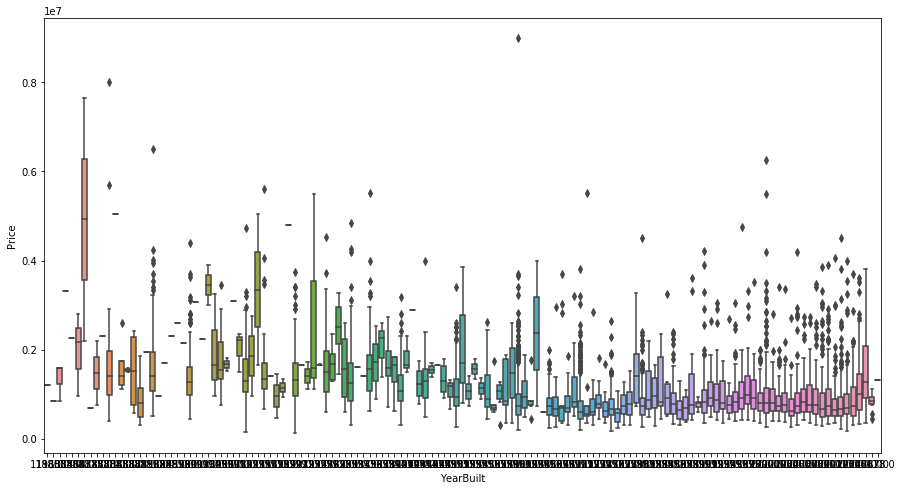

In [71]:
#探索性可视化：Exploratory Visualization
plt.figure(figsize=(15,8))
x=melbourne_data.YearBuilt
y=melbourne_data.Price
sns.boxplot(x,y)

In [72]:
melbourne_data['Price'].describe()

count    6.196000e+03
mean     1.068828e+06
std      6.751564e+05
min      1.310000e+05
25%      6.200000e+05
50%      8.800000e+05
75%      1.325000e+06
max      9.000000e+06
Name: Price, dtype: float64

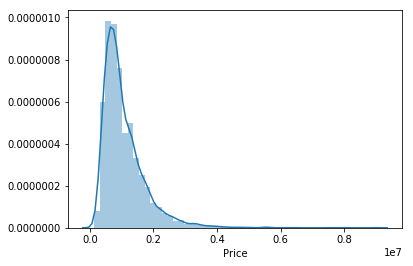

In [77]:
sns.distplot(melbourne_data['Price'])

In [74]:
#数据清洗：Data clean
#查看缺省值,发现有4个特征存在缺省值，一次排序
sum=melbourne_data.isnull().sum()
sum[sum>0].sort_values(ascending=False)

Series([], dtype: int64)

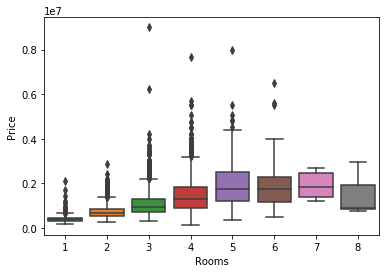

In [81]:
var = 'Rooms'
data = pd.concat([melbourne_data['Price'], melbourne_data[var]], axis=1)
fig = sns.boxplot(x=var, y="Price", data=data)

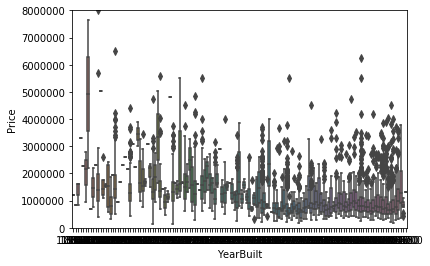

In [88]:
var = 'YearBuilt'
data = pd.concat([melbourne_data['Price'], melbourne_data[var]], axis=1)
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=8000000);

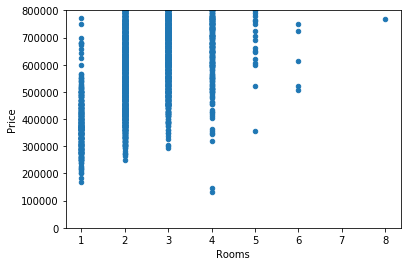

In [103]:
# YearBuilt  scatter
var = 'Rooms'
data = pd.concat([melbourne_data['Price'], melbourne_data[var]], axis=1)
data.plot.scatter(x=var, y="Price", ylim=(0, 800000))

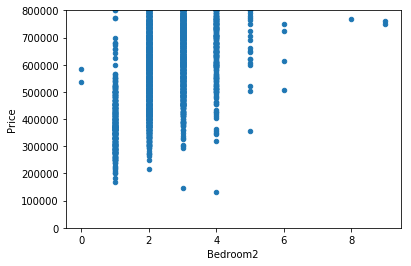

In [99]:
# YearBuilt  scatter
var = 'Bedroom2'
data = pd.concat([melbourne_data['Price'], melbourne_data[var]], axis=1)
data.plot.scatter(x=var, y="Price", ylim=(0, 800000))

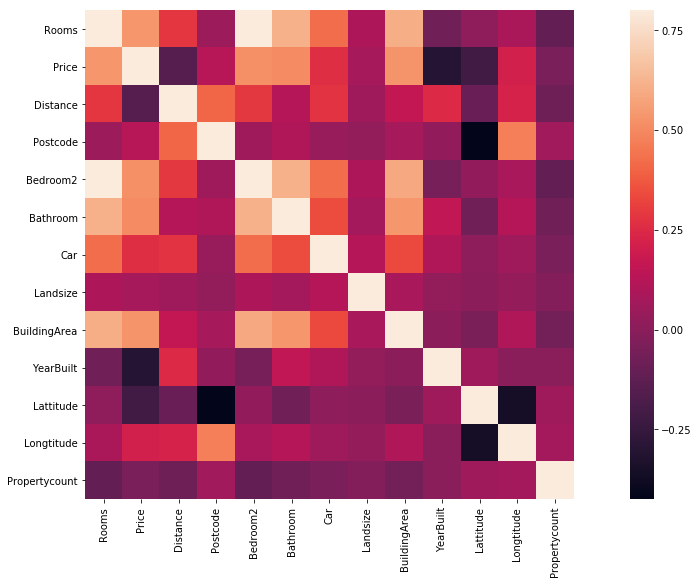

In [101]:
#特征提取：关系矩阵
corrmat = melbourne_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

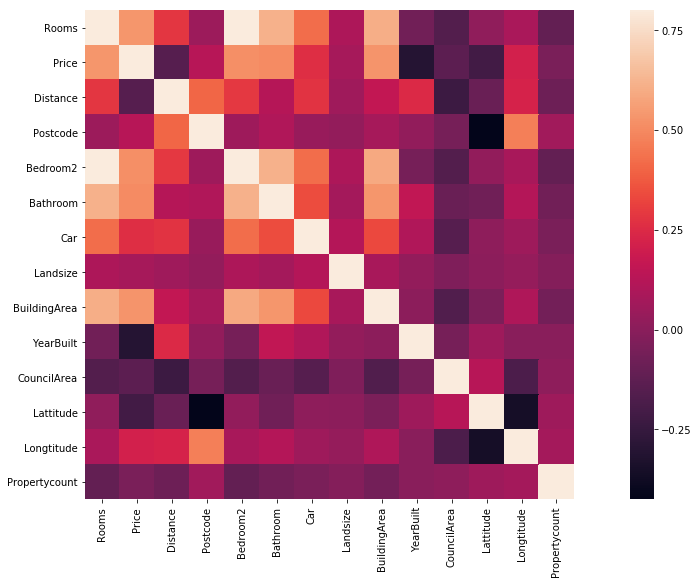

In [106]:
from sklearn import preprocessing
f_names = ['CouncilArea']
for x in f_names:
    label = preprocessing.LabelEncoder()
    melbourne_data[x] = label.fit_transform(melbourne_data[x])
corrmat = melbourne_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

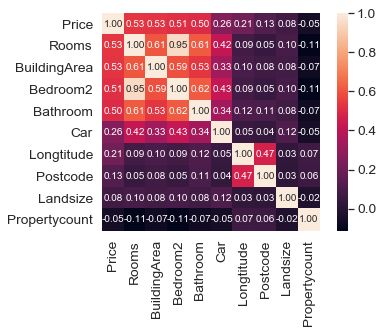

In [108]:
import numpy as np
k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(melbourne_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [109]:
#特征项
melbourne_features = ['Rooms', 'BuildingArea', 'Bedroom2', 'Bathroom']

In [110]:
X = melbourne_data[melbourne_features]
X.describe()

,Rooms,BuildingArea,Bedroom2,Bathroom
count,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,141.568645,2.902034,1.576340
std,0.971079,90.834824,0.970055,0.711362
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,91.000000,2.000000,1.000000
50%,3.000000,124.000000,3.000000,1.000000
75%,4.000000,170.000000,3.000000,2.000000
max,8.000000,3112.000000,9.000000,8.000000


e:\program files\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


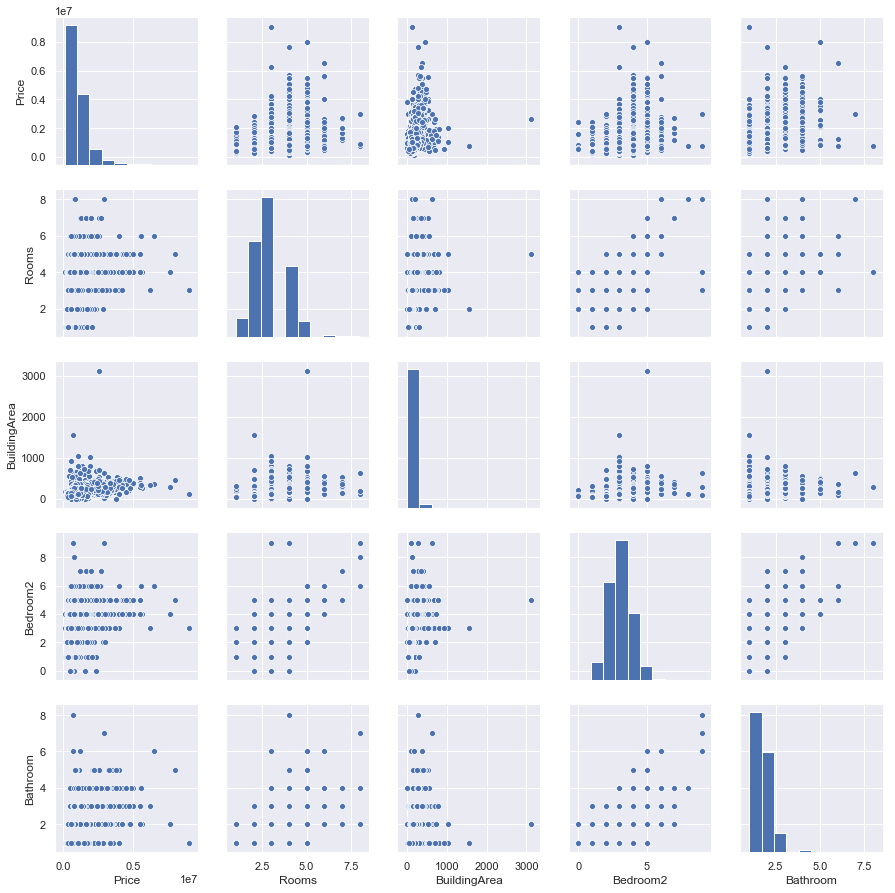

In [112]:
#绘制特征的关系散点图
sns.set()
cols = ['Price','Rooms', 'BuildingArea', 'Bedroom2', 'Bathroom']
sns.pairplot(melbourne_data[cols], size = 2.5)
plt.show()

In [114]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
# from sklearn.cross_validation import train_test_split
import numpy as np

In [116]:
# 获取数据
cols = ['Price','Rooms', 'BuildingArea', 'Bedroom2', 'Bathroom']
x = melbourne_data[cols].values
y = melbourne_data['Price'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
# X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)